# Spambase
Group 7 - Project Proposal
- Evan Armstrong
- Rapeewit Chanprakaisi #57529208
- Riyan Qureshi
- Kathryn Wu

## Introduction

Spam email and text have been a rapidly growing problem since the 1990s. Spam email is unsolicited bulk email, with content varying from explicit to commercial (Cranor et al., 1998, p.74). Bulk email is inexpensive and easy to send, but burdens email service providers and wastes recipients' resources on sorting out legitimate communications. While spam mail has been declining as of 2013, it has grown more sophisticated, able to disguise their messages from filters (Irani et al., 2013, p.2).

The Spambase dataset is a "bag of words"-style collection acquired from assorted emails. Its variables of interest include the frequencies of various words, the lengths of uninterrupted capital letter sequences, and the email's classification as spam(1) or non-spam(0).

As spam becomes more complex, humans may need to manually discern what in their inbox is spam and is not spam. To supply human intuition with data, we will estimate an informative population parameter. Spam often tries to create a false sense of urgency or grab viewers' attention. Therefore, we will start off simple and focus on the location and scale of one parameter, the average length of uninterrupted sequences of capital letters. 

The question we set out to answer in this report is:

#### "Is the mean of the average length of uninterrupted sequences of capital letters different for spam vs non-spam email?"

Should there be a significant difference, users of our analysis will be able to determine if an email is spam. For instance, if an email has unusually long sequences of capital letters, then it may be suspicious.

While we fall short of designing a robust decision tree or similar model to automatically detect such emails, we hope that the insights gleaned through this research may provide the basis for users' manual classifications in dealing with suspicious messages.

## Preliminary Results

We will first load the dataset and needed packages. Tidying the data does not require much work; the data is already "one observation per row; one variable per column".

In [39]:
# install.packages("gridExtra") # useful in later graphing, to prevent taking up screen space

In [6]:
library(tidyverse)
library(repr)
library(datateachr) # do we really need this? This is the ubc educational package
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




We use `read.csv()` to read the data set from the web and give names to the columns with `col_names()` . Then, we convert the binary 0 and 1 to non-spam and spam in the class variable. 

In [7]:
spambase <- read.csv("https://raw.githubusercontent.com/rchanpra/stat-201-project/main/spambase/spambase.data")

In [8]:
colnames(spambase) <- c("word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our",
                        "word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail",
                        "word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses",
                        "word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit",
                        "word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp",
                        "word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs",
                        "word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85",
                        "word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct",
                        "word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project", "word_freq_re",
                        "word_freq_edu","word_freq_table","word_freq_conference","char_freq_;","char_freq_(",
                        "char_freq_[","char_freq_!","char_freq_$","char_freq_#","capital_run_length_average",
                        "capital_run_length_longest","capital_run_length_total","class")

In [9]:
spambase <- 
    spambase %>% 
    mutate(class = ifelse(class == 1, "spam", "non-spam"))

In [10]:
nrow(spambase)
head(spambase)

[1] 4600

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,⋯,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam
6,0.00,0.00,0.00,0,1.92,0.00,0.00,0.00,0.00,0.64,⋯,0.00,0.054,0,0.164,0.054,0.000,1.671,4,112,spam


Next, we compute point estimates for the the mean and standard deviation of average run length of capital letters.

In [11]:
# Considering that the dataset is a sample from the larger population of spam email,
# computing the mean and standard deviation of the word frequencies for each class produces our point estimates
# We select the columns we need (class and capital_run_length_average)

spambase_selected <- spambase %>%
    select(capital_run_length_average,class) 

spambase_stats <- spambase_selected %>%
    group_by(class) %>%
    summarize(mean_capital_run_length_average = mean(capital_run_length_average),
              sd_capital_run_length_average = sd(capital_run_length_average))
head(spambase_stats)

class,mean_capital_run_length_average,sd_capital_run_length_average
<chr>,<dbl>,<dbl>
non-spam,2.377301,5.113685
spam,9.522345,49.859762


We can see that in our sample, spam has a greater mean and standard deviation than non-spam email. We conclude anything definitively yet, but this is a promising start.

We now plot a boxplot of the sample distribution with `geom_boxplot()`, and visualize the sample distribution with `geom_histogram()`.

In [34]:
# Graph the distribution of variable of interest for each class, with vertical lines indicating the means of each class
options(repr.plot.width = 8, repr.plot.height = 4)

spam_boxplot <- spambase_selected %>% 
    ggplot() +
    geom_boxplot(aes(class, capital_run_length_average, fill = class), outlier.shape = NA) +
    # we do not display some extreme values, which are impractical to plot
    scale_y_continuous(limits = c(0, 10)) +
    theme(text = element_text(size = 14)) +
    ggtitle("Boxplot of average length of capital letter runs for Spam and Non-Spam emails") + 
    xlab("Class") + 
    ylab("Average length of uninterrupted sequence of capital letters")

Warning message:
“Removed 189 rows containing non-finite values (`stat_boxplot()`).”
Warning message in plot_grid(spam_histogram, non_spam_histogram, cols = 2):
“Argument 'cols' is deprecated. Use 'ncol' instead.”
Warning message:
“Removed 42 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


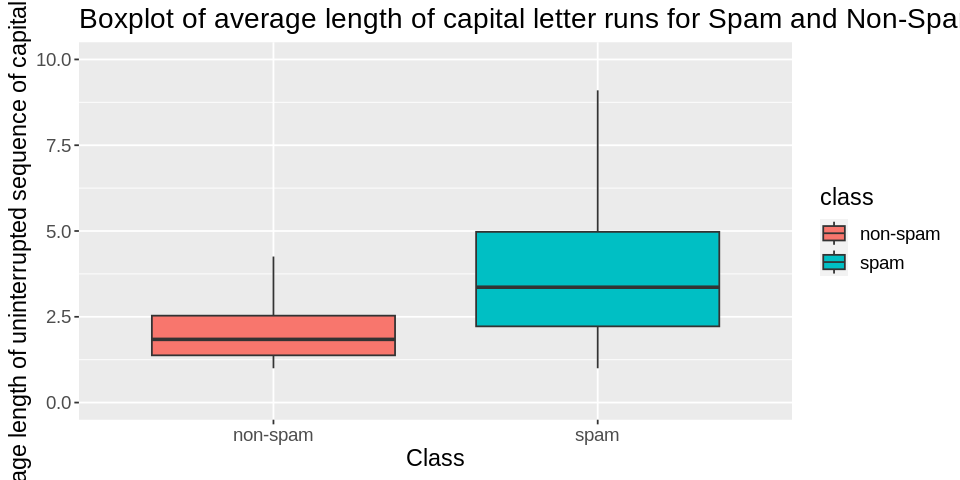

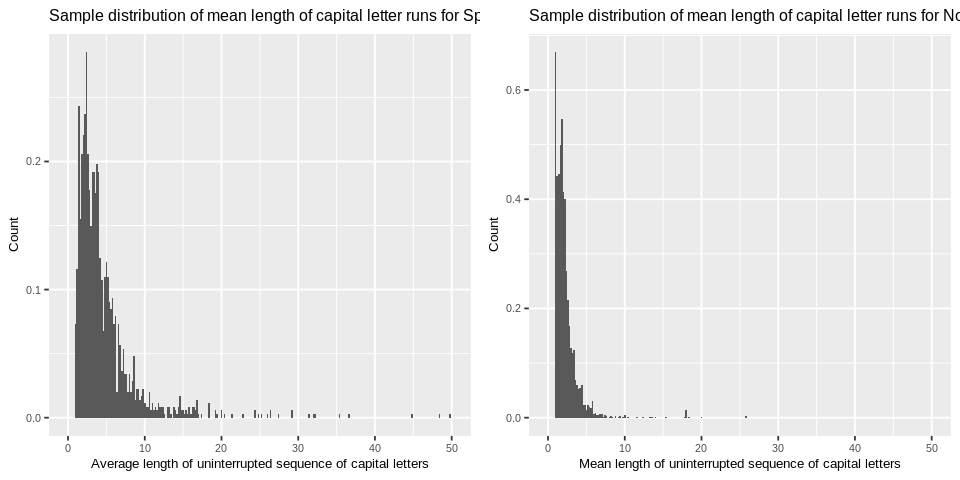

In [39]:
spam_histogram <- spambase_selected %>% 
    filter(class == "spam") %>%
    ggplot() +
    geom_histogram(aes(x = capital_run_length_average, y = ..density..), binwidth = 0.2) +
    # we do not display some extreme values, which are impractical to plot
    scale_x_continuous(limits = c(0, 50)) +
    theme(text = element_text(size = 8)) +
    ggtitle("Sample distribution of mean length of capital letter runs for Spam emails") + 
    ylab("Count") + 
    xlab("Average length of uninterrupted sequence of capital letters")

non_spam_histogram <- spambase_selected %>% 
    filter(class == "non-spam") %>%
    ggplot() +
    geom_histogram(aes(x = capital_run_length_average, y = ..density..), binwidth = 0.2) +
    # we do not display some extreme values, which are impractical to plot
    scale_x_continuous(limits = c(0, 50)) +
    theme(text = element_text(size = 8)) +
    ggtitle("Sample distribution of mean length of capital letter runs for Non-Spam emails") + 
    ylab("Count") + 
    xlab("Mean length of uninterrupted sequence of capital letters")

spam_boxplot
plot_grid(spam_histogram, non_spam_histogram, cols = 2)

## Relevance of plot
The above plot visualizes the distribution of average run length of capitals across spam and non-spam emails. We can see that that spam emails typically have a greater average length with a wider range of values, even without seeing the outliers. 

<NOTE: IF WE FIGURE OUT HOW TO PLOT DISTRIBUTION, INSERT ANALYSIS OF SAMPLE DISTRIBUTION>

Based on these results, we might assume that an email with longer all capital sentences is more likely to be spam. This observation partially addresses our research question, but we should do a more thorough analysis to make any inferences or bold statements.

## Methods: Plan

The `Spambase` dataset is large — it has 4600 rows. Thus by the Law of Large Numbers, its point estimates are likely to be more accurate than might often be observed in samples<NOTE: FACT CHECK>. Our initial research question can be addressed by estimates and distribution we currently have.

However, a point estimate is just a single value that does not tell us any information about what range of values the true population parameter may take on, nor does it give us any idea of how likely we are to be wrong (FACTCHECK ON TERM UNDERSTANDING NEEDED ON THAT LAST BIT. ALSO MAYBE CITATIONS? BUT PROBABLY NOT K: I think the likeliness to be correct applies to both???). 

In our final analysis, we plan to perform bootstrap sampling to build a confidence interval of the difference in means, gaining a range of values that we are confident contains the true parameter value. We will also do hypothesis testing for the difference in means, to find the likelihood of obtaining such a difference if the mean values are the same. 

#### What do we expect to find?

If there is no difference in the mean value of run length, then we would expect the confidence interval to contain the value 0. We would also expect the p-value calculated from our hypothesis test, with H0: mus = mun and Ha: mus does not equal mun. (NOTE: FIGURE OUT HOW TO FORMAT THIS)

#### What impact could such findings have?

In completing this study, we will attain values that describe the difference in mean average run length of capital sequences and their standard deviations, *while also* knowing how uncertain these values are. This information could prove to be useful to individuals learning how to approach unsolicited messages in their inbox. 
These findings may also be useful to marketing companies who want to avoid being mistaken for spam. Spam detection is an incredibly important endeavor — while plenty of models exist to detect spam, human-interpretable data might make it easier for the engineers and managers behind the models to make informed decisions and deliberate improvements. Finally, there is also the possibility that scammers will use these findings to tailor their messages to evade detection

#### What future questions could this lead to?

Our study is limited in scope to only sequences of capital letters. The dataset overall contains many more variables, and even those are a subset of the total words used harvested from the original dataset. An immediate question that arises is: What other patterns, means, standard deviations, and other parameters exist? Which of these are associated with spam and non-spam? 

Finally, when it comes to applying this knowledge, we might wonder how the information our analysis uncovers might be used to refine and improve existing spam-detection models.

## References

- Hopkins,Mark, Reeber,Erik, Forman,George, and Suermondt,Jaap. (1999). Spambase. UCI Machine Learning Repository. https://doi.org/10.24432/C53G6X.